In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd 

In [6]:
df=pd.read_csv(r"c:\Users\HP\OneDrive\Desktop - Copy\Desktop\StudentsPerformance.csv")

In [7]:
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


1. Check for missing values in each column.


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

2. compare average math performance between genders

In [ ]:
df.groupby("gender")["math score"].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

3.Display the count of students based on their parental level of education.

In [ ]:

df["parental level of education"].value_counts()


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

4. average writing score for each race/ethnicity group 

In [ ]:
df.groupby('race/ethnicity')['writing score'].mean()

race/ethnicity
group A    62.674157
group B    65.600000
group C    67.827586
group D    70.145038
group E    71.407143
Name: writing score, dtype: float64

5. Check how many students did not complete the test preparation course.

In [ ]:
df[df['test preparation course'] == 'none'].shape[0]

642

6. Calculate the overall average of all three subjects for the entire dataset.

In [12]:
df[['math score', 'reading score', 'writing score']].mean().mean()


np.float64(67.77066666666666)

7.Count how many students scored less than 50 in any subject

In [ ]:
df[(df['math score'] < 50) | (df['reading score'] < 50) | (df['writing score'] < 50)].shape[0]

188

8. Find the average math score of students for each parental level of education.

In [ ]:
df.groupby('parental level of education')['math score'].mean()

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

9. creating a new column named ‘total’ by adding math, reading, and writing scores

In [ ]:
df['total'] = df['math score'] + df['reading score'] + df['writing score']
df.nlargest(5, 'total')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
458,female,group E,bachelor's degree,standard,none,100,100,100,300
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297


10. Find how many males and females are there.

In [23]:
df['gender'].value_counts()


gender
female    518
male      482
Name: count, dtype: int64

11. Show students who got above 80 in all three subjects.

In [24]:
df[(df['math score'] > 80) & (df['reading score'] > 80) & (df['writing score'] > 80)]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82
49,male,group C,high school,standard,completed,82,84,82
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
962,female,group E,associate's degree,standard,none,100,100,100
970,female,group D,bachelor's degree,standard,none,89,100,100
979,female,group C,associate's degree,standard,none,91,95,94


12. Show all rows where the math score is below the reading score.

In [25]:
df[df['math score'] < df['reading score']]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


13. Find the top 10 students with the highest reading score.

In [26]:
df.nlargest(10, 'reading score')


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
149,male,group E,associate's degree,free/reduced,completed,100,100,93
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
381,male,group C,associate's degree,standard,completed,87,100,95
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99


14. Show only students from group A and group B who have completed the test preparation course.

In [27]:
df[(df['race/ethnicity'].isin(['group A', 'group B'])) & (df['test preparation course'] == 'completed')]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
6,female,group B,some college,standard,completed,88,95,92
13,male,group A,some college,standard,completed,78,72,70
21,female,group B,some college,free/reduced,completed,65,75,70
43,male,group B,some college,free/reduced,completed,59,65,66
46,female,group A,associate's degree,standard,completed,55,65,62
...,...,...,...,...,...,...,...,...
972,female,group A,high school,free/reduced,completed,53,50,60
976,male,group B,some college,free/reduced,completed,60,62,60
982,male,group B,some high school,standard,completed,79,85,86
983,female,group A,some college,standard,completed,78,87,91


15. Find how many students scored between 60 and 80 in writing.

In [28]:
df[(df['writing score'] >= 60) & (df['writing score'] <= 80)].shape[0]


511

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df =pd.read_csv(r"c:\Users\HP\OneDrive\Desktop - Copy\Desktop\StudentsPerformance.csv")

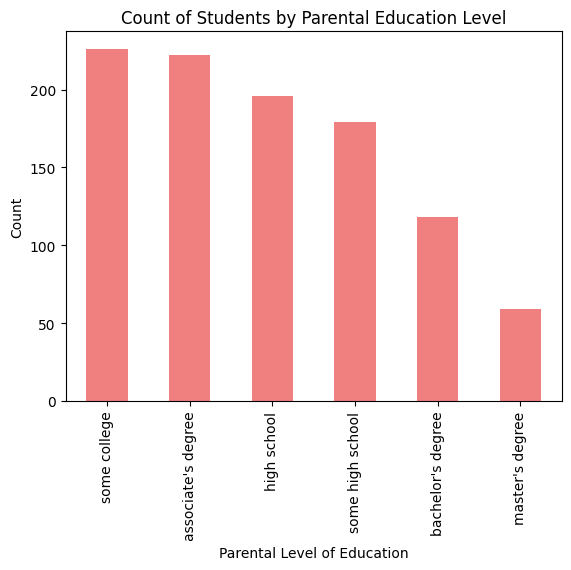

In [41]:
df["parental level of education"].value_counts().plot(kind="bar", color="lightcoral")
plt.title("Count of Students by Parental Education Level")
plt.xlabel("Parental Level of Education")
plt.ylabel("Count")
plt.show()

*The bar chart above shows how the number of students is distributed based on their parents’ level of education.

**From the visualization:**

**1>** The most common parental education levels are **“some college” and “associate's degree.”**

**2>** The least common is **“master’s degree.”**

**3>** This suggests that most students come from families with mid-level educational backgrounds, while fewer have parents with advanced degrees.

**4>** It could also indicate that students from moderately educated families form the majority representation in this dataset, possibly influencing overall performance trends.

<Insight:>The educational background of parents might have an impact on students’ academic scores — a deeper analysis can explore whether higher parental education correlates with higher test scores.



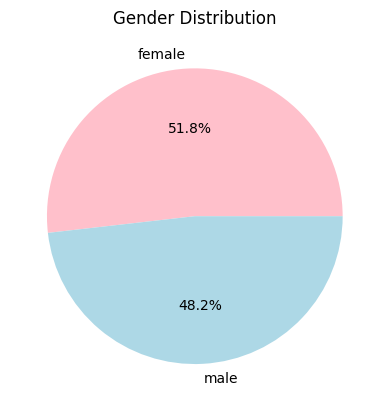

In [43]:
df["gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["pink", "lightblue"], title="Gender Distribution")
plt.ylabel("")  # Removes y-label for cleaner look
plt.show()


**The pie chart displays the percentage of male vs female students in the dataset, helping visualize gender representation.**

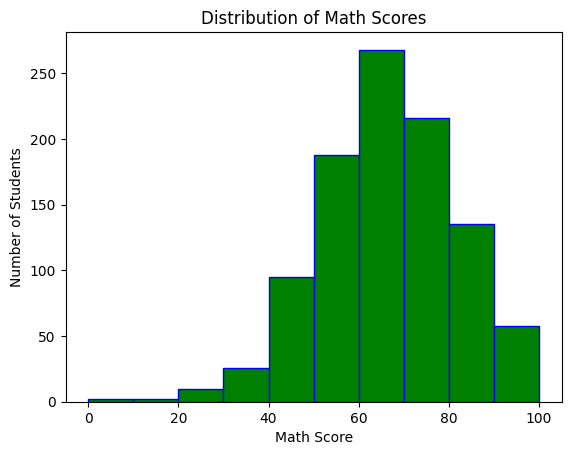

In [47]:
df["math score"].plot(kind="hist", bins=10, color="green", edgecolor="blue", title="Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Number of Students")
plt.show()


*The histogram represents the spread of students’ math scores across the dataset.*


1: **Most students scored between 60 and 80 marks, showing that the majority of students perform around the average range.** 

2: **A smaller number of students scored below 50, indicating that very few struggled significantly in math.**

3: **There are also a few students who achieved 90 and above, representing high performers.**

4: **The overall shape of the histogram appears slightly right-skewed, meaning more students scored on the higher end compared to the lower end.**

**Conclusion:**
*The distribution suggests that most students perform moderately well in math, with a fair number of high scorers and only a few low performers.*

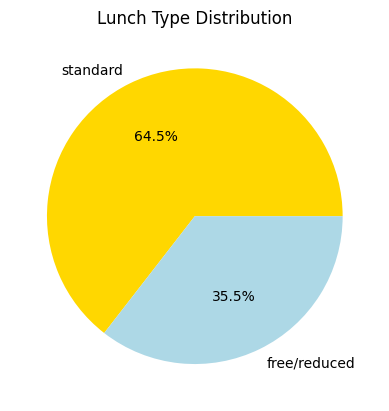

In [49]:
df["lunch"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=["gold", "lightblue"],
    title="Lunch Type Distribution"
)
plt.ylabel("")
plt.show()


*This pie chart shows the proportion of students who receive standard lunch versus those with free/reduced lunch.*

1> **A larger portion of the pie is occupied by the standard lunch category, indicating that most students come from families who can afford regular-priced meals.**

2> **The smaller section represents students receiving free or reduced lunch, often linked to lower-income backgrounds.**

3> **This visualization helps us understand the socio-economic diversity of the student group and how access to resources like nutrition may differ among them.**

**Conclusion:**
*The dataset suggests that a majority of students have access to standard lunches, while a smaller but notable group benefits from free or reduced lunch programs.*

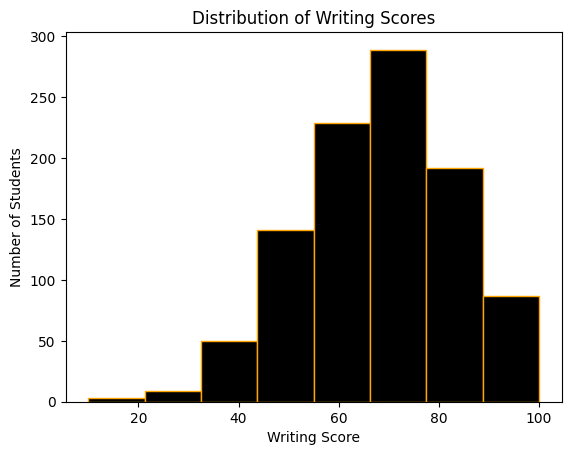

In [52]:
df["writing score"].plot(
    kind="hist",
    bins=8,
    color="black",
    edgecolor="orange" ,
    title="Distribution of Writing Scores"
)
plt.xlabel("Writing Score")
plt.ylabel("Number of Students")
plt.show()


*The histogram illustrates how students’ writing scores are distributed across different score ranges.*

1) **Most students have writing scores clustered between 60 and 80 marks, showing that average performance is quite common.**

2) **A smaller number of students scored below 50, indicating only a few low performers.**

3) **There are also noticeable counts near 90 and above, representing high achievers in writing.**

4) **The overall distribution appears slightly right-skewed, meaning more students scored on the higher side than the lower side.**

**Conclusion:**
*The majority of students perform fairly well in writing, with many achieving above-average marks and only a few falling behind.*

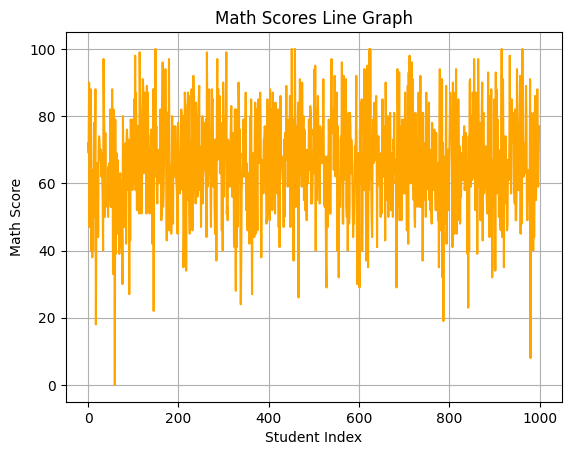

In [9]:
df["math score"].plot(
    kind="line",
    color="orange",
    title="Math Scores Line Graph"
)

plt.xlabel("Student Index")
plt.ylabel("Math Score")
plt.grid(True)
plt.show()


*The line graph displays the trend of math scores for all students.*

> **The scores fluctuate across students, showing variation in performance.**

> **Some students scored very high, while others scored much lower, creating visible peaks and dips.**

> **The overall pattern indicates that math performance is not consistent among students.**

**Conclusion:**
Students show a wide range of math abilities, with no single trend dominating the dataset.

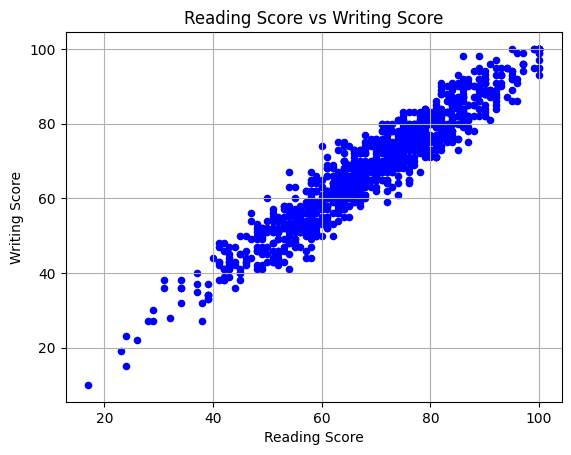

In [11]:
df.plot(
    kind="scatter",
    x="reading score",
    y="writing score",
    color="blue",
    title="Reading Score vs Writing Score"
)

plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.grid(True)
plt.show()

*The scatter plot shows the relationship between reading and writing scores.*

< **Most points are clustered along a rising diagonal, meaning students who score high in reading usually do well in writing too.**

< **The tight clustering suggests a strong positive correlation between the two subjects.**

< **There are very few outliers, showing that this trend is consistent across most students.**

**Conclusion**:
*Good reading skills are closely linked with good writing performance in this dataset.*